![2](green.png)

### Abstract :
Develop a model to Classify fetal health in order to prevent child and maternal mortality using features extracted from Cardiotocogram exams. 





Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress. The UN expects that by 2030, countries should end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.

Parallel to the notion of child mortality is, of course, maternal mortality, which accounts for 295,000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented.

In light of what was mentioned above, Cardiotocograms (CTGs) are a simple and cost-accessible option to assess fetal health, allowing healthcare professionals to take action to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, shedding light on fetal heart rate (FHR), fetal movements, uterine contractions, and more.

### Data : 

This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetricians into 3 classes:

- Normal
- Suspect
- Pathological





### <font color=''> Load Libraries  :<font>

In [46]:
# import library for numerical operations
import numpy as np 

# import library for data manipulation and analysis
import pandas as pd

# import library for statistical functions
from scipy import stats

# import library for data preprocessing and scaling
from sklearn import preprocessing

# import library for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import library for handling missing values
from sklearn.impute import KNNImputer

# import library for feature scaling
from sklearn.preprocessing import MinMaxScaler

# import library for Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB

# import library for Logistic Regression classifier
from sklearn.linear_model import LogisticRegression

# import library for Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

# import library for Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# import library for K-Nearest Neighbors classifier
from sklearn.neighbors import KNeighborsClassifier

# import library for Support Vector Machine (SVM) classifier
from sklearn.svm import SVC

# import library for Gradient Boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

# import library for splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# import libraries for model evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# import libraries for hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


## Load & understand data


In [68]:
df = pd.read_csv('fetal_health.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [70]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columnns.")

The dataset has 2126 rows and 22 columnns.


First 22 columns would be our features and the last column would be our target variable.Let's check the distribution of fetal health in order to see the how many are 
- Normal
- Suspect
- Pathological

In [80]:
df['fetal_health'].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

In [89]:
import plotly.express as px

# Assuming df is your DataFrame and 'fetal_health' is the column name
value_counts = df['fetal_health'].value_counts()

# Create a dictionary to map category codes to labels
category_labels = {1: 'Normal', 2: 'Suspect', 3: 'Pathological'}

# Map category codes to labels in the 'names' parameter
fig = px.pie(names=value_counts.index.map(category_labels), 
             values=value_counts.values,
             title='Distribution of Fetal Health',
             color=value_counts.index.map(category_labels),
             color_discrete_sequence=['#FF9999', '#66B2FF', '#99FF99'],  # Choose elegant colors  # Choose elegant colors
             )

# Customize the layout
fig.update_layout(
    font=dict(family='Arial', size=12, color='black'),  # Change font properties as needed
    plot_bgcolor='white',  # Change plot background color
)

fig.show()


**The majority of the target variables fall into the "Normal" category, constituting approximately 77.8% of the dataset. "Suspect" cases follow at 13.90%, while "Pathological" instances account for 8.28%. The distribution suggests a predominantly healthy dataset, with a relatively small proportion of cases requiring further scrutiny.**







## Data  Pre - processing  

In [50]:
missing_values = df.isnull().sum()

# Display the count of missing values for each column
print(missing_values)

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

* The dataset comprises 22 attributes with a total of 2126 observations, and there are no missing values.
* All data types in the dataset are numeric, represented as float values.

### Feature description ([source](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6822315/)):
1. baseline value: Fetal heart rate baseline (beats per minute)
2. accelerations: Number of accelerations per second
3. fetal_movement: Number of fetal movements per second
4. uterine_contractions: Number of uterine contractions per second
5. light_decelerations: Number of light decelerations per second
6. severe_decelerations: Number of severe decelerations per second
7. prolongued_decelerations: Number of prolonged decelerations per second
8. abnormal_short_term_variability: Percentage of time with abnormal short-term variability
9. mean_value_of_short_term_variability: Mean value of short-term variability
10. percentage_of_time_with_abnormal_long_term_variability: Percentage of time with abnormal long-term variability
11. mean_value_of_long_term_variability: Mean value of long-term variability
12. histogram_width: Width of FHR histogram
13. histogram_min: Minimum of FHR histogram
14. histogram_max: Maximum of FHR histogram
15. histogram_number_of_peaks: Number of FHR histogram peaks
16. histogram_number_of_zeroes: Number of FHR histogram zeroes
17. histogram_mode: FHR histogram mode
18. histogram_mean: FHR histogram mean
19. histogram_median: FHR histogram median
20. histogram_variance: FHR histogram variance
21. histogram_tendency: FHR histogram tendency

**Target Variable:** 

22. fetal_health: Fetal state class code (1=Normal, 2=Suspected, 3=Pathological)

### Handling duplicated rows

In [52]:
# check shape before drop
df.shape

(2113, 22)

In [57]:
# drop duplicated row
df = df.drop_duplicates()

# Confirm the removal of duplicated rows
print(f"Number of rows after removing duplicates is {len(df)}.")

Number of rows after removing duplicates is 2113.


### Handling outlier

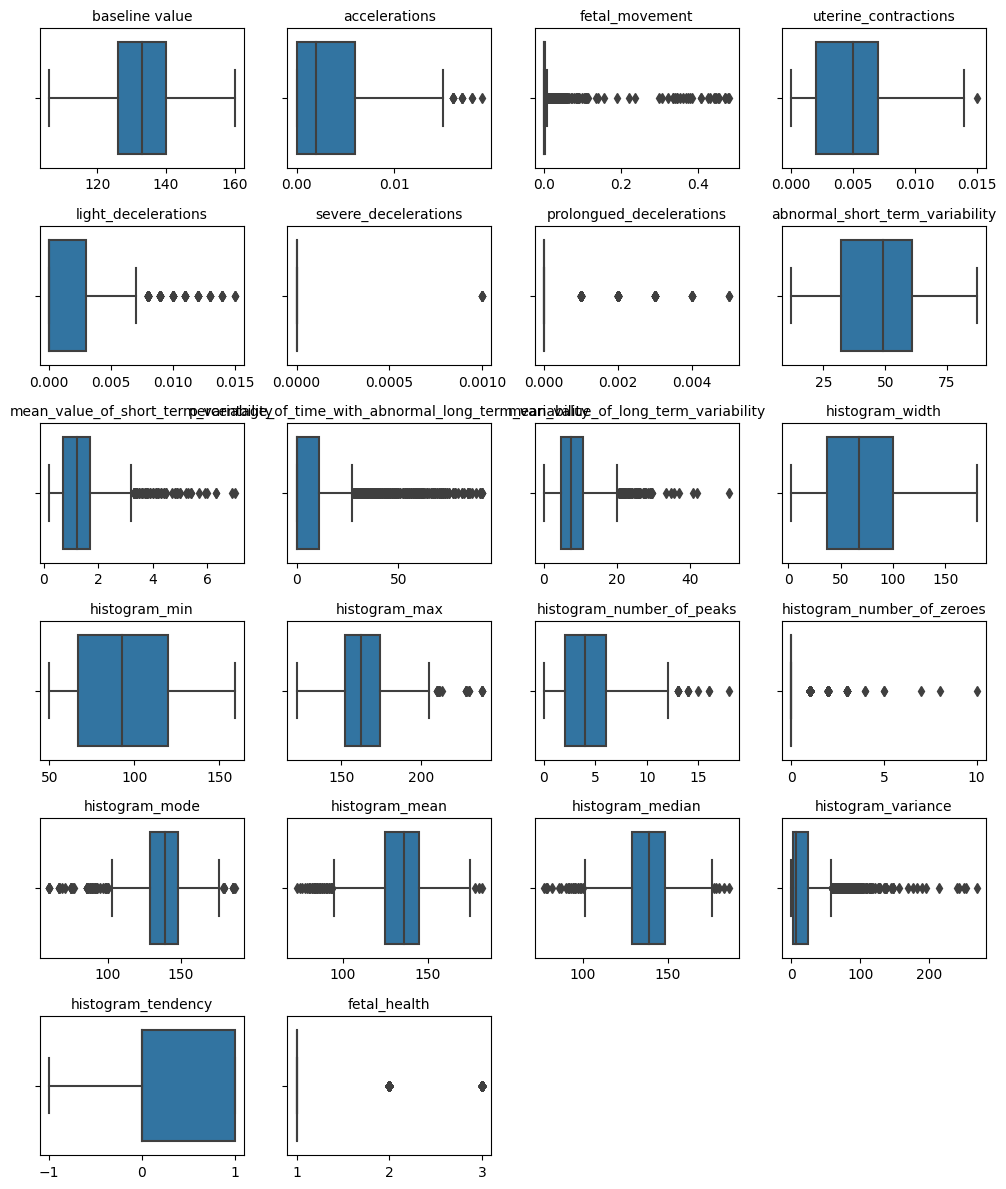

In [65]:
# Handling outlier for numeric attributes 
# Create a 2x3 grid of subplots
fig, axes = plt.subplots(6, 4, figsize=(10, 12))
axes = axes.flatten()
    
# Create a boxplot for each continuous variable
for i, column in enumerate(df.columns):
    sns.boxplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(f"{column}", fontsize=10)
    axes[i].set_xlabel("")  # Remove x-axis title

# Remove empty subplot
for i in range(len(df.columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

The boxplots reveal potential outliers in several attributes. Yet, after thorough evaluation by three expert obstetricians, these outliers may not signify anomalies in the clinical context. Instead, they might represent signals of fetal distress, maternal conditions, among other factors. Consequently, no corrective action is planned for values outside the boxplot range.

## Label encoding

In [9]:
# Convert target variable to discrete/interger
df['fetal_health'] = df['fetal_health'].astype(int)

## Data Splitting
The dataset is divided into a 70-30 split for training and testing, respectively.

In [10]:
df_features = df.drop(['fetal_health'], axis=1)
df_target = df['fetal_health']

# split df at 70-30 ratio
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.3, random_state=123)

## Data Transformation
* Applied separately to the train_set and test_set.
* Scaling and normalization are executed to bring all continuous variables onto a standardized scale, facilitating comparisons among variables with different units and ranges.
* Transformation is applied to all features as they are numerical data.
* Utilized formula: 
$x = \frac{{x - \text{{mean}}}}{{\text{{stdev}}}}$


In [93]:
# Initialize the MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the train_set & test_set, features only
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [95]:
scaled_X_train = pd.DataFrame(scaled_X_train, columns = X_train.columns, index=X_train.index)
scaled_X_train.head(2)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
468,0.703704,0.000000,0.004158,0.133333,0.0,0.0,0.0,0.96,0.014706,0.373626,...,0.197740,0.759259,0.413793,0.111111,0.0,0.666667,0.642202,0.620370,0.000000,0.0
1143,0.296296,0.222222,0.000000,0.400000,0.4,0.0,0.0,0.12,0.220588,0.000000,...,0.372881,0.222222,0.181034,0.222222,0.0,0.579365,0.440367,0.444444,0.118959,1.0


In [96]:
scaled_X_test = pd.DataFrame(scaled_X_test, columns = X_test.columns, index=X_test.index)
scaled_X_test.head(2)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
1542,0.716981,0.157895,0.000000,0.571429,0.0,0.0,0.0,0.507042,0.074627,0.065934,...,0.254335,0.642202,0.382609,0.1875,0.0,0.692913,0.737374,0.722772,0.012,0.5
753,0.452830,0.000000,0.002096,0.000000,0.0,0.0,0.0,0.619718,0.044776,0.362637,...,0.092486,0.688073,0.182609,0.1250,0.0,0.543307,0.555556,0.544554,0.008,0.0


# Modeling

## Considered Modeling Algorithms:
- Naive Bayes
- Logistic Regression
- Decision Tree
- Random Forest with hyperparameter tuning
- Support Vector Machines (SVM)
- Gradient Boosting Classifier with hyperparameter tuning

These algorithms are being explored to identify the most suitable model for the given task.

In [100]:
#Import algorithms

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import time

# Assuming you have scaled_X_train, y_train, scaled_X_test, y_test

# Initialize the classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

# Initialize the result summary table
result_summary = {'Model': [], 'Time (s)': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1_Score': []}

# Train and evaluate each classifier
for name, classifier in classifiers.items():
    # Record start time for training
    start_time_train = time.time()

    # Training
    classifier.fit(scaled_X_train, y_train)

    # Record end time for training
    end_time_train = time.time()

    # Record start time for prediction
    start_time_pred = time.time()

    # Predictions on the testing set
    y_pred = classifier.predict(scaled_X_test)

    # Record end time for prediction
    end_time_pred = time.time()

    # Calculate time taken for training and prediction
    train_time = end_time_train - start_time_train
    pred_time = end_time_pred - start_time_pred

    # Evaluate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store results in the summary table
    result_summary['Model'].append(name)
    result_summary['Time (s)'].append(train_time + pred_time)
    result_summary['Accuracy'].append(accuracy)
    result_summary['Precision'].append(precision)
    result_summary['Recall'].append(recall)
    result_summary['F1_Score'].append(f1)

# Display the result summary table
import pandas as pd

result_df = pd.DataFrame(result_summary)
#print(result_df)

# Display the result summary table with better styling
result_df = pd.DataFrame(result_summary)
styled_df = result_df.style.set_table_styles([
    {'selector': 'thead',
     'props': [
         ('font-size', '18px'),
         ('color', 'darkblue'),
         ('background-color', 'lightgrey')
     ]},
    {'selector': 'th',
     'props': [
         ('font-size', '16px'),
         ('color', 'black'),
         ('background-color', 'lightgrey')
     ]},
    {'selector': 'td',
     'props': [
         ('font-size', '14px')
     ]},
])

styled_df




,Model,Time (s),Accuracy,Precision,Recall,F1_Score
0,Random Forest,0.253015,0.936909,0.937571,0.936909,0.937222
1,Logistic Regression,0.023286,0.897476,0.896898,0.897476,0.896012
2,Naive Bayes,0.002660,0.723975,0.882384,0.723975,0.761609
3,SVM,0.056045,0.917981,0.918238,0.917981,0.916987
4,Gradient Boosting,0.895311,0.935331,0.938232,0.935331,0.936439
5,Decision Tree,0.011241,0.891167,0.898603,0.891167,0.894013


**Observation : Based on the provided results, it seems that "Random Forest" and "Gradient Boosting" are the top-performing classifiers based on F1-Score**

### Hyper-parameter tunning of Random forest classifier 

In [106]:
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler  # Assuming you have scaled_X_train, y_train
from sklearn.exceptions import FitFailedWarning

# Ignore FitFailedWarning
warnings.filterwarnings("ignore", category=FitFailedWarning)

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],  # Remove 'auto'
}

# Initialize the Random Forest classifier
random_forest = RandomForestClassifier()

# Set max_features to 'auto' here if you want it to be the default
random_forest.set_params(max_features='auto')

# Create a GridSearchCV object for Random Forest
grid_search_rf = GridSearchCV(
    random_forest,
    param_grid=param_grid_rf,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    error_score='raise'  # Raise an error for non-finite scores
)

# Fit the GridSearchCV object to the training data for Random Forest
grid_search_rf.fit(scaled_X_train, y_train)

# Get the best hyperparameters for Random Forest
best_params_rf = grid_search_rf.best_params_

# Print the best hyperparameters for Random Forest
print("Best Hyperparameters for Random Forest:", best_params_rf)


Best Hyperparameters for Random Forest: {'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


### Hyper-parameter tunning of Gradient Boosting Classifier

In [107]:
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler  # Assuming you have scaled_X_train, y_train
from sklearn.exceptions import FitFailedWarning

# Ignore FitFailedWarning
warnings.filterwarnings("ignore", category=FitFailedWarning)

# Define the parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],  # Remove 'auto'
}

# Initialize the Gradient Boosting classifier
gradient_boosting = GradientBoostingClassifier()

# Set max_features to 'auto' here if you want it to be the default
gradient_boosting.set_params(max_features='auto')

# Create a GridSearchCV object for Gradient Boosting
grid_search_gb = GridSearchCV(
    gradient_boosting,
    param_grid=param_grid_gb,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    error_score='raise'  # Raise an error for non-finite scores
)

# Fit the GridSearchCV object to the training data for Gradient Boosting
grid_search_gb.fit(scaled_X_train, y_train)

# Get the best hyperparameters for Gradient Boosting
best_params_gb = grid_search_gb.best_params_

# Print the best hyperparameters for Gradient Boosting
print("Best Hyperparameters for Gradient Boosting:", best_params_gb)


Best Hyperparameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}


### Model Performance after Hyper-parameter Tunning 

In [111]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import time
import pandas as pd


# Initialize the classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Random Forest (Tuned)': RandomForestClassifier(**best_params_rf),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Gradient Boosting (Tuned)': GradientBoostingClassifier(**best_params_gb)
}

# Initialize the result summary table
result_summary = {'Model': [], 'Time (s)': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1_Score': []}

# Train and evaluate each classifier
for name, classifier in classifiers.items():
    # Record start time for training
    start_time_train = time.time()

    # Training
    classifier.fit(scaled_X_train, y_train)

    # Record end time for training
    end_time_train = time.time()

    # Record start time for prediction
    start_time_pred = time.time()

    # Predictions on the testing set
    y_pred = classifier.predict(scaled_X_test)

    # Record end time for prediction
    end_time_pred = time.time()

    # Calculate time taken for training and prediction
    train_time = end_time_train - start_time_train
    pred_time = end_time_pred - start_time_pred

    # Evaluate performance metrics
    accuracy = round(accuracy_score(y_test, y_pred), 3)
    precision = round(precision_score(y_test, y_pred, average='weighted'), 3)
    recall = round(recall_score(y_test, y_pred, average='weighted'), 3)
    f1 = round(f1_score(y_test, y_pred, average='weighted'), 3)

    # Store results in the summary table
    result_summary['Model'].append(name)
    result_summary['Time (s)'].append(round(train_time + pred_time, 3))
    result_summary['Accuracy'].append(accuracy)
    result_summary['Precision'].append(precision)
    result_summary['Recall'].append(recall)
    result_summary['F1_Score'].append(f1)

# Display the result summary table with better styling
result_df = pd.DataFrame(result_summary)
styled_df = result_df.style.set_table_styles([
    {'selector': 'thead',
     'props': [
         ('font-size', '18px'),
         ('color', 'darkblue'),
         ('background-color', 'lightgrey')
     ]},
    {'selector': 'th',
     'props': [
         ('font-size', '16px'),
         ('color', 'black'),
         ('background-color', 'lightgrey')
     ]},
    {'selector': 'td',
     'props': [
         ('font-size', '14px')
     ]},
])

styled_df


,Model,Time (s),Accuracy,Precision,Recall,F1_Score
0,Random Forest,0.263000,0.937000,0.938000,0.937000,0.937000
1,Random Forest (Tuned),0.377000,0.942000,0.943000,0.942000,0.942000
2,Gradient Boosting,0.949000,0.935000,0.938000,0.935000,0.936000
3,Gradient Boosting (Tuned),0.363000,0.938000,0.940000,0.938000,0.939000


### Observation:

After hyperparameter tuning, both **Random Forest** and **Gradient Boosting** models demonstrated improvements across various performance metrics. The tuned *Random Forest* model exhibited enhanced precision, recall, and F1 Score, resulting in an overall accuracy boost. Similarly, the *Gradient Boosting* model, after tuning, showcased improved precision, recall, and F1 Score, indicating increased effectiveness in classifying instances. The results affirm the positive impact of hyperparameter optimization on model performance.

### Opportunities for Further Exploration:

Given that we haven't exhaustively employed all available machine learning classification algorithms and techniques, there exists significant potential to enhance results. Additionally, I recommend delving into deep learning methodologies to assess whether they yield superior outcomes in our context.

#### Citation
Ayres de Campos et al. (2000) SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms. J Matern Fetal Med 5:311-318 ([link](insert_link_here))
#### License
The license was not specified at the source; however, access to the data is public, and a citation was requested.
